### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

My Github repository link: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-ranjeetunm

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # seaborn is based on matplotlib
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline  
# tells python to actually display the graphs

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Data  = pd.read_csv('Data.csv') # Import the dataset named 'Data.csv'
item  = pd.read_csv('item.csv') # Import the dataset named 'item.csv'
user  = pd.read_csv('user.csv') # Import the dataset named 'user.csv'

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
Data.info() # To see the data type of each of the variable, number of values entered in each of the variables
print("\nShape of dataframes Data = ", Data.shape) # size of data
print('\n',  Data.describe()) # the output results provide the five number summary of the data.
print("\nNumber of missing values in Data =\n",Data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Shape of dataframes Data =  (100000, 4)

             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


In [4]:
item.info() # To see the data type of each of the variable, number of values entered in each of the variables
print("\nShape of dataframes item = ", item.shape) # size of data
print('\n', item.describe()) # the output results provide the five number summary of the data.
print("\nNumber of missing values in item =\n",item.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [5]:
user.info() # To see the data type of each of the variable, number of values entered in each of the variables
print("\nShape of dataframes user = ", user.shape) # size of data
print('\n', user.describe()) # the output results provide the five number summary of the data.
print("\nNumber of missing values in user =\n",user.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

Shape of dataframes user =  (943, 5)

           user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

Number of missing values in user =
 user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [11]:
# use sum on the default axis
#Create a dataframe with droping frist 3 columns
movieDataFrame = pd.DataFrame(item,columns=item.columns.tolist()[3:])

itemSeries = movieDataFrame.sum()

print("Number of movies per genre are")
print(itemSeries)

Number of movies per genre are
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 5 marks

In [8]:
#hint: use sum on the axis = 1

#Create a dataframe with droping frist 3 columns
movieDataFrame = pd.DataFrame(item,columns=item.columns.tolist()[3:])

#If sum of all the genre for a perticular movie is more then 1 add that entry to new dataFrame
movieWithMoreThenOneGenre = movieDataFrame.loc[movieDataFrame.sum(axis=1) > 1]

#Make Index of dataframe as new column 'id'
#movieWithMoreThenOneGenre['id'] = movieWithMoreThenOneGenre.index

print("Movies that have more than one genre are\n")
for movieIndex in movieWithMoreThenOneGenre.index:
    print("",item.iloc[movieIndex, 1])



Movies that have more than one genre are

 Toy Story 
 GoldenEye 
 Get Shorty 
 Copycat 
 Twelve Monkeys 
 Babe 
 Richard III 
 Seven (Se7en) 
 Usual Suspects, The 
 Postino, Il 
 French Twist (Gazon maudit) 
 From Dusk Till Dawn 
 Angels and Insects 
 Muppet Treasure Island 
 Braveheart 
 Taxi Driver 
 Rumble in the Bronx 
 Apollo 13 
 Batman Forever 
 Crimson Tide 
 Desperado 
 Doom Generation, The 
 Free Willy 2: The Adventure Home 
 Mad Love 
 Net, The 
 Strange Days 
 Disclosure 
 Dolores Claiborne 
 Eat Drink Man Woman 
 Ed Wood 
 I.Q. 
 Star Wars 
 Legends of the Fall 
 Natural Born Killers 
 Outbreak 
 Professional, The 
 Pulp Fiction 
 Stargate 
 Santa Clause, The 
 What's Eating Gilbert Grape 
 While You Were Sleeping 
 Crow, The 
 Forrest Gump 
 Four Weddings and a Funeral 
 Lion King, The 
 Mask, The 
 Maverick 
 Faster Pussycat! Kill! Kill! 
 Carlito's Way 
 Firm, The 
 Free Willy 
 Fugitive, The 
 Hot Shots! Part Deux 
 Hudsucker Proxy, The 
 Jurassic Park 
 Much Ado Abou

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [9]:
#Original shape
print("Original Shape of dataset (item) = ",item.shape)

#Droping the row in which the value of item in column unknow is 1
noUnknown = item.drop(item.loc[item['unknown'] == 1].index)

print("After drop Shape of dataset (item) = ",noUnknown.shape)
noUnknown

Original Shape of dataset (item) =  (1681, 22)
After drop Shape of dataset (item) =  (1680, 22)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [10]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [11]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


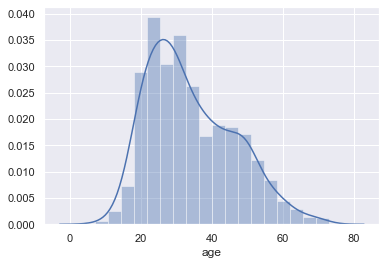

In [12]:
#displot for age
agePlot = sns.distplot(user['age'])

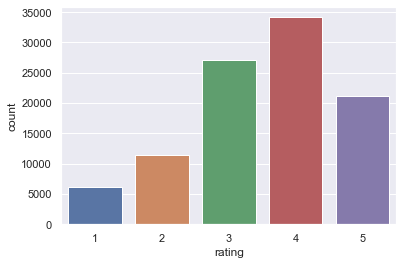

In [13]:
# countplot for ratings of movie.
ratingPlot = sns.countplot( x = 'rating', data=Data)

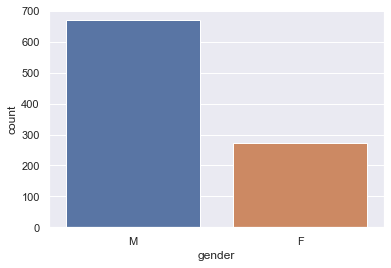

In [14]:
# countplot for ratings of movie.
genderPlot = sns.countplot(x='gender', data=user)

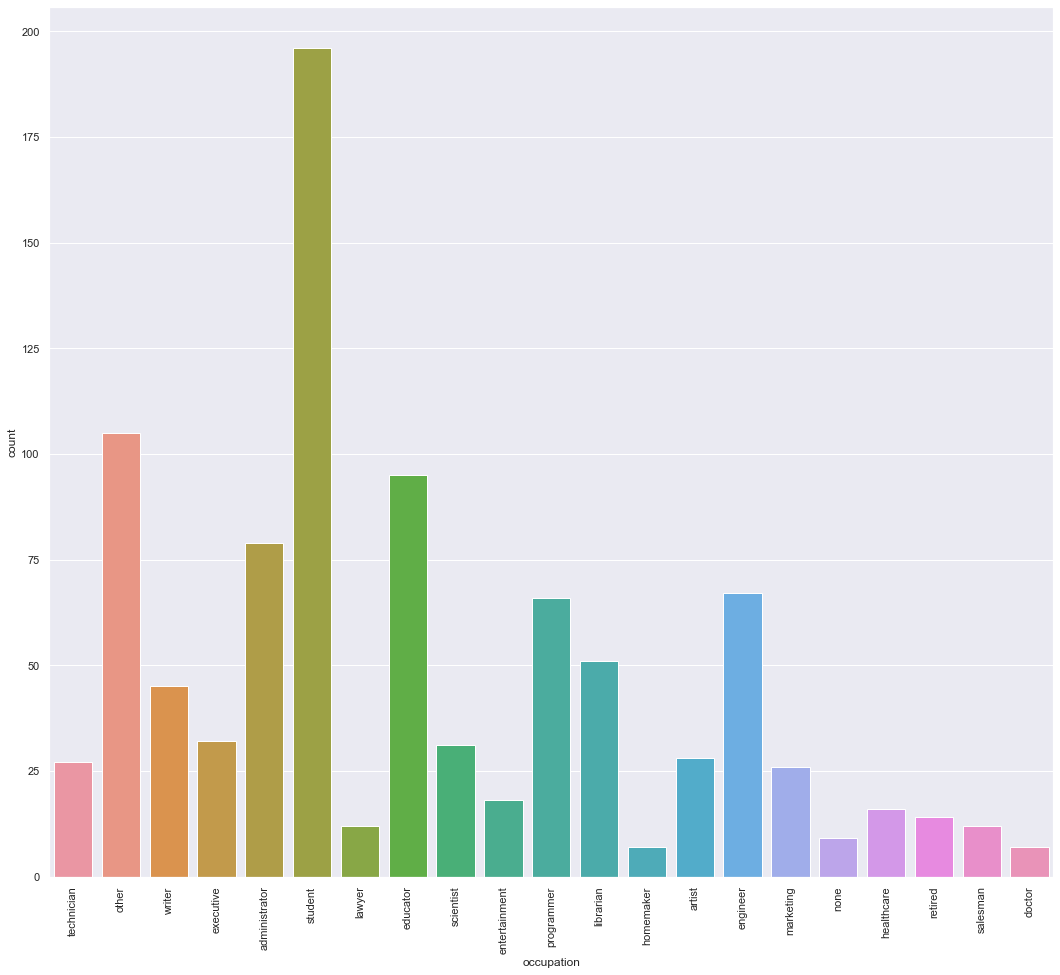

In [15]:
#countplot for occupation
plt.figure(figsize=(18,16))
occupationPlot = sns.countplot(x='occupation', data=user)
occupationPlot.set_xticklabels(occupationPlot.get_xticklabels(), rotation=90);

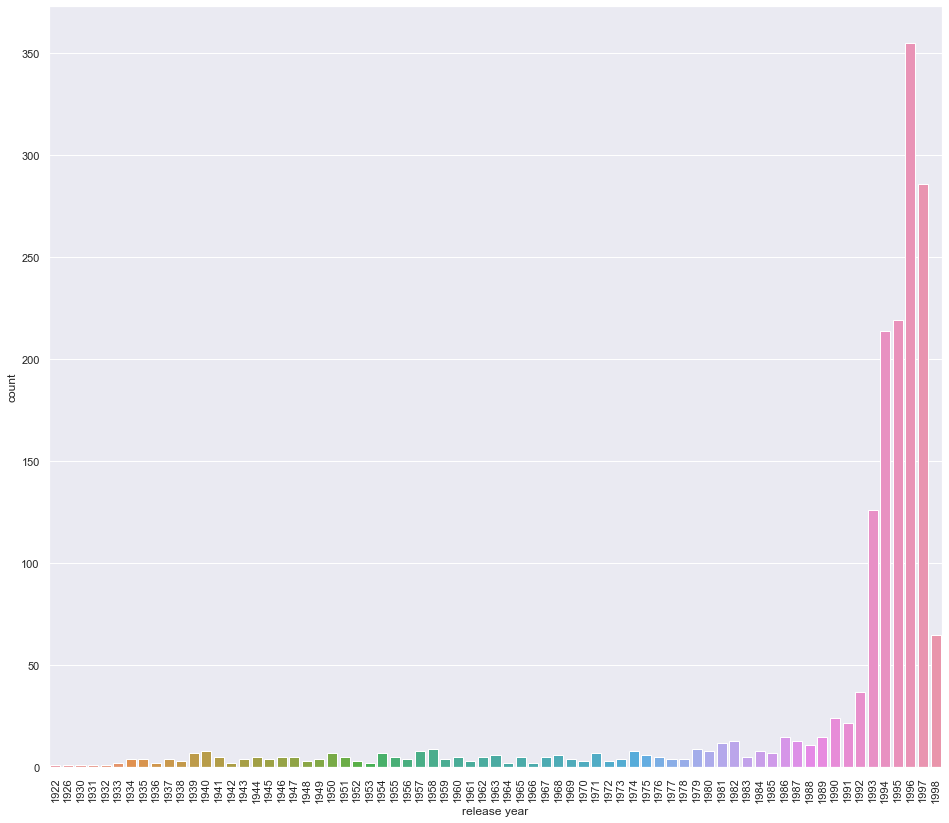

In [16]:
#movieDataFrame = pd.DataFrame(item)
movieDataFrame = item.copy()

#function to get year
def GetYear(s):
    return s[-4:]

#Create a series with only year from 
movieReleaseYear = item['release date'].apply(GetYear)

#add year column to movieDataFrame
movieDataFrame['release year'] = movieReleaseYear

#plot 
plt.figure(figsize=(16,14))
releaseYearPlot = sns.countplot(x='release year', data=movieDataFrame)
releaseYearPlot.set_xticklabels(releaseYearPlot.get_xticklabels(), rotation=90);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

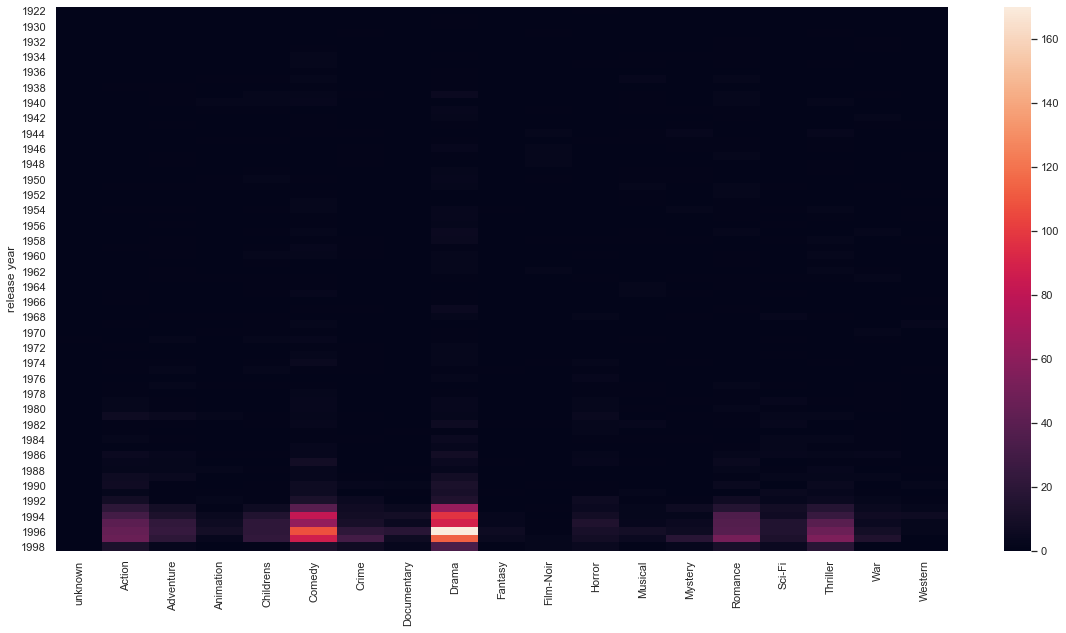

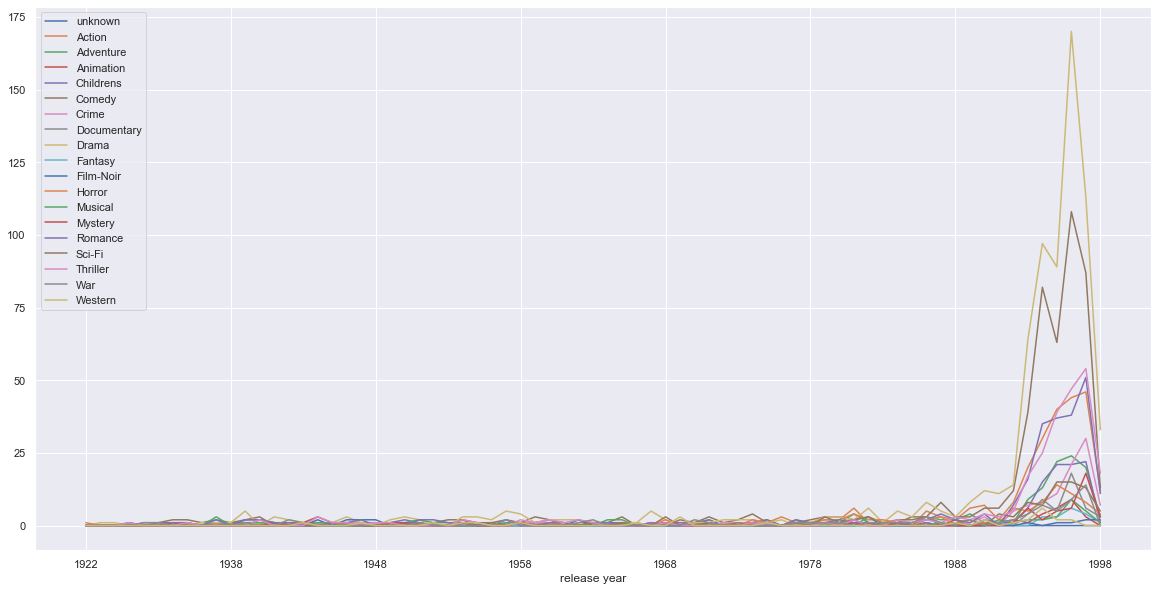

In [19]:
#Your answer here
#Using movieDataFrame from previous answer
genrePopularity = pd.DataFrame(movieDataFrame,columns=movieDataFrame.columns.tolist()[3:])
genreReleasePerYear = genrePopularity.groupby('release year').sum()

plt.figure(figsize=(20,10))

sns.heatmap(genreReleasePerYear, annot=False);  # plot the correlation coefficients as a heatmap
genreReleasePerYear.plot.line(figsize=(20,10));


From Heatmap and line plot we can say the popularity of most of genre increased over years. Increase for some genre is greated than increase for some other genre.

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [20]:
#your answer here

#create a datafram with movie id and rating
ratingDF = Data[['movie id', 'rating']]

#Movies that have more than 100 ration
rating = ratingDF.groupby('movie id') .count().sort_values(['rating'], ascending=False)
ratingMoreThan100 = pd.DataFrame(rating[rating['rating'] >= 100].index)

#Merge Data and ratingMoreThan100 to get data set through which 
#we can get the ids and the average rating.
idsForMoviesMoreThan100ratings = pd.merge(Data, ratingMoreThan100, left_on='movie id', right_on='movie id', how='inner')
#idsForMoviesMoreThan100ratings.head()

#take mean of rating 
top25MoviesWithMoreThan100Ratings = idsForMoviesMoreThan100ratings.groupby('movie id').mean().sort_values(['rating'], ascending=False)['rating'].head(25)
#type(top25MoviesWithMoreThan100Ratings)#.head(25)
#print(top25MoviesWithMoreThan100Ratings)

#Create new datafram
finalOutputDF = pd.DataFrame(columns=['Movie Name','Movie ID', 'Ave. Rating'])

for ind in top25MoviesWithMoreThan100Ratings.index:
    movieindex = item[item['movie id'] == ind]['movie title'].index
    nameOfMovie = item.loc[movieindex[0]]['movie title']
    ave = top25MoviesWithMoreThan100Ratings[ind]
    finalOutputDF = finalOutputDF.append({'Movie Name':nameOfMovie,'Movie ID':ind,'Ave. Rating':ave},ignore_index=True)
    
finalOutputDF

,Movie Name,Movie ID,Ave. Rating
0,"Close Shave, A",408,4.491071
1,Schindler's List,318,4.466443
2,"Wrong Trousers, The",169,4.466102
3,Casablanca,483,4.456790
4,"Shawshank Redemption, The",64,4.445230
5,Rear Window,603,4.387560
6,"Usual Suspects, The",12,4.385768
7,Star Wars,50,4.358491
8,12 Angry Men,178,4.344000
9,Citizen Kane,134,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [21]:
#create a df with skipping first 3 colunms
genreDF = item[3:]

listOFGenre = genreDF.columns[:]


#Men
userIdForMen = user[user['gender'] == 'M']['user id']
totalMenUsers = Data[Data['user id'].isin(userIdForMen)].shape[0]

#Women
userIdForWomen = user[user['gender'] == 'F']['user id']
totalWomenUsers = Data[Data['user id'].isin(userIdForWomen)].shape[0]

#Genre needed to answer this question
relaventGenres = ['Drama','Sci-Fi','Romance']


for gen in relaventGenres:
    
    #Movie ids
    movieIdForThisGenre = item[item[gen] > 0]['movie id']
    #print(movieIdForThisGenre)
    
    #Movies of this Genre seen by Men
    men = Data[Data['user id'].isin(userIdForMen) & Data['movie id'].isin(movieIdForThisGenre)]
    menPercent = men.shape[0] * 100 / totalMenUsers
    
    #Movies of this Genre seen by Men
    women = Data[Data['user id'].isin(userIdForWomen) & Data['movie id'].isin(movieIdForThisGenre)]
    womenPercent = women.shape[0] * 100 / totalWomenUsers
    
    print(menPercent, '% of men and', womenPercent, '% of women watched', gen)


38.89981147320226 % of men and 42.76612276612276 % of women watched Drama
13.602208456773498 % of men and 10.213675213675213 % of women watched Sci-Fi
18.318071640183142 % of men and 22.758352758352757 % of women watched Romance


1. From the above results we see 38.89% Men and 42.76% Women watch Drama so we see that more women watch drama then men so statement is false.
2. Form the about results we see 13.6% Men and 10.21% Women watch Sci-Fi so we see that more men watch Sci-Fi then women so statement is false.
3. Form the about results we see 18.31% Men and 22.75% Women watch Romance so we see that more women watch Romance then men so statement is false.